# Computational Project Part 1
minimizing a multivariate function $f(x)$ using gradient-based method with backtracking.  

In [1]:
import numpy as np
np.set_printoptions(suppress=True) 
# pip install numdifftools
import numdifftools as nd
import matplotlib.pyplot as plt

helper function: return the gradient of function at x

In [1]:
def gradient(f,x):
    # input: f: function
    gradf = nd.Gradient(f) 
    
    # output: gradient of f at x
    return (gradf(x))

##### (a) Use backtracking as described in class to compute step-lengths (so you need to set the parameters s, $\gamma, \beta$) 
$s>0, \gamma \in (0,1), \beta \in (0,1)$

let $\alpha^{(k)}=s$, $d^{(k)} = -\nabla f(x^{(k)})$

if $f(x^{(k)})-f(x^{(k)}+\alpha^{(k)}d^{(k)}) \ge -\gamma\alpha^{(k)}\nabla f(x^{(k)})^Td^{(k)}$, $\alpha^{(k)}=s$

otherwise, $\alpha^{(k)}=\beta \alpha^{(k)}=\beta s$

In [3]:
def backtrack (f, x, s, gamma, beta):
    
    i = 1
    alpha = s
    d = - gradient(f, x)
#     print ("initial alpha (step length) = {} \n".format(alpha))
    
    while f(x) - f(x + alpha*d) < - gamma * alpha * np.dot(gradient(f,x), d):
        alpha *= beta  
#         print ("iteation {}, alpha (step length) = {} \n".format(i,alpha))
        i += 1
    # output: step lengths
    return alpha 

##### Try example: $f_1(x) = x_1^2 + x_2^2 + x_3^2$ with $x^{(0)}=(1,1,1)^T$

set $s=2, \gamma=0.25, \beta=0.5$

In [4]:
f=lambda xyz: xyz[0]**2 + xyz[1]**2 + xyz[2]**2
x0 = np.array([1,1,1])
# compute function value 
f(x0)
# compute gradient 
gradient(f, x0)
# backtracking step length 
backtrack (f, x = x0, s=2, gamma=0.25, beta=0.5)

0.5

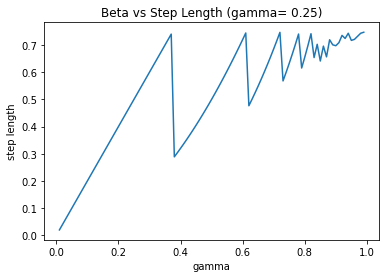

In [5]:
y=[]
x = np.arange(0.01,1,0.01)
for i in x:
    y.append(backtrack (f, x = x0, s=2, gamma=0.25, beta=i))

plt.plot(x,y)
plt.title('Beta vs Step Length (gamma= 0.25)')
plt.xlabel('gamma')
plt.ylabel('step length')
plt.show()

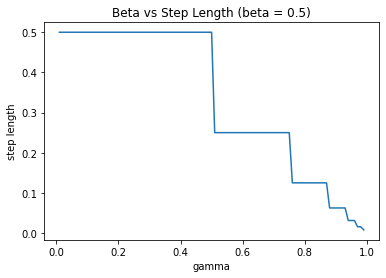

In [6]:
y=[]
x = np.arange(0.01,1,0.01)
for i in x:
    y.append(backtrack (f, x = x0, s=2, gamma=i, beta=0.5))

plt.plot(x,y)
plt.title('Beta vs Step Length (beta = 0.5)')
plt.xlabel('gamma')
plt.ylabel('step length')
plt.show()

##### (b) Use as a stopping condition $\frac{||\nabla f||}{1+|f(x)|} \le \epsilon $ with $\epsilon = 10^{-5}$ or stop if the number of iterations hits 1000.
 

In [7]:
epsilon = 1e-05
max_iter = 1000

##### (c) Print the initial point and for each iteration print the search direction, the step length, and the new iterate $x^{k+1}$. If the number of itrerations is more than 15 then printout the details of the just the first 10 iterations as well as the details of the last 5 iterations before the stopping condition is met. Indicate if the iteration maximum is reached.

In [8]:
def min_function (f, x, s=2, gamma=0.25, beta=0.5):
    print ('initial point = {}, gradient = {} \n'.format(x,gradient(f,x)))
    output = [] 
    
    for n in range(1,1001): # 1- 1000
        
        if np.linalg.norm(gradient(f,x))/(1 + np.abs(f(x))) < epsilon:
            output.append (' ')
            output.append('stop at iteration {}, current x = {}, gradient = {}, f = {}'.format(n-1, x, gradient(f,x),f(x)))
            break

        else: 
            d = - gradient(f, x)                        # search direction
            alpha = backtrack (f, x, s, gamma, beta)    # step length            
            x = x + alpha*d                             # new iterate x
            output.append('iteration {}, search direction = {}, step length = {}, x = {}'.format(n,d,alpha,x))
            
            # Indicate if the iteration maximum is reached
            if n == 1000:
                output.append('Iteration maximum is reached')
    
    if len(output[0:-1]) < 15: 
        for i in range(len(output)):
            print (output[i]) 
    else:
        for i in range(10):
            print (output[i])
        print ('    ...... \n    ......')
        for i in range(len(output[0:-1])-6,len(output)):
            print (output[i])


##### (d) Test your algorithms on the following test problems

##### (1) $f_1(x) = x_1^2 + x_2^2 + x_3^2$ with $x^{(0)}=(1,1,1)^T$

In [9]:
min_function (f=lambda xyz: xyz[0]**2 + xyz[1]**2 + xyz[2]**2,
              x = np.array([1,1,1]),
              s=2, gamma=0.25, beta=0.5)

initial point = [1 1 1], gradient = [2. 2. 2.] 

iteration 1, search direction = [-2. -2. -2.], step length = 0.5, x = [0. 0. 0.]
 
stop at iteration 1, current x = [0. 0. 0.], gradient = [0. 0. 0.], f = 1.4791141972893971e-31


In [10]:
# gradient converges to [0,0,0]
# x converge to [0,0,0] 

# compute f(x)
f=lambda xyz: xyz[0]**2 + xyz[1]**2 + xyz[2]**2
f(np.array([0,0,0]))

0

##### (2) $f_2(x) = x_1^2+2x_2^2 -2x_1x_2-2x_2$ with $x^{(0)} = (0, 0)^T$

In [11]:
min_function (f = lambda xy: xy[0]**2 + 2*xy[1]**2 -2*xy[0]*xy[1]-2*xy[1],
              x = np.array([0,0]),
              s=2, gamma=0.25, beta=0.5)

initial point = [0 0], gradient = [ 0. -2.] 

iteration 1, search direction = [-0.  2.], step length = 0.25, x = [0.  0.5]
iteration 2, search direction = [ 1. -0.], step length = 0.5, x = [0.5 0.5]
iteration 3, search direction = [-0.  1.], step length = 0.25, x = [0.5  0.75]
iteration 4, search direction = [0.5 0. ], step length = 0.5, x = [0.75 0.75]
iteration 5, search direction = [-0.   0.5], step length = 0.25, x = [0.75  0.875]
iteration 6, search direction = [ 0.25 -0.  ], step length = 0.5, x = [0.875 0.875]
iteration 7, search direction = [-0.    0.25], step length = 0.25, x = [0.875  0.9375]
iteration 8, search direction = [ 0.125 -0.   ], step length = 0.5, x = [0.9375 0.9375]
iteration 9, search direction = [0.    0.125], step length = 0.25, x = [0.9375  0.96875]
iteration 10, search direction = [ 0.0625 -0.    ], step length = 0.5, x = [0.96875 0.96875]
    ...... 
    ......
iteration 29, search direction = [0.         0.00012207], step length = 0.25, x = [0.99993896 0.9

In [12]:
# x converge to x = [1,1]
# gradient converge to [0,0] 

f = lambda xy: xy[0]**2 + 2*xy[1]**2 -2*xy[0]*xy[1]-2*xy[1]
gradient (f = lambda xy: xy[0]**2 + 2*xy[1]**2 -2*xy[0]*xy[1]-2*xy[1],
          x = np.array([1,1]))

array([0., 0.])

##### (3) $f_3(x)=100(x_2-x_1^2)^2 + (1-x_1)^2$ with $x^{(0)} = (-1.2,1)^T$

In [13]:
min_function (f= lambda xy: 100*(xy[1]-xy[0]**2)**2 + (1-xy[0])**2,
              x = np.array([-1.2,1]),
              s=2, gamma=0.25, beta=0.5)

initial point = [-1.2  1. ], gradient = [-215.6  -88. ] 

iteration 1, search direction = [215.6  88. ], step length = 0.0009765625, x = [-0.98945313  1.0859375 ]
iteration 2, search direction = [-38.33803031 -21.38400269], step length = 0.0009765625, x = [-1.02689261  1.06505468]
iteration 3, search direction = [-0.27816415 -2.10925141], step length = 0.00390625, x = [-1.02797919  1.05681542]
iteration 4, search direction = [ 4.02544229 -0.01484275], step length = 0.5, x = [0.98474196 1.04939405]
iteration 5, search direction = [ 31.41515509 -15.93546343], step length = 0.0009765625, x = [1.01542082 1.03383207]
iteration 6, search direction = [ 1.08718639 -0.55052448], step length = 0.0009765625, x = [1.01648253 1.03329445]
iteration 7, search direction = [-0.00949734 -0.01154359], step length = 0.015625, x = [1.01633413 1.03311408]
iteration 8, search direction = [ 0.0401058  -0.03580224], step length = 0.0009765625, x = [1.0163733  1.03307912]
iteration 9, search direction = [-0.006

In [14]:
# x converge to x = [1,1]
# gradient converge to [0,0] 

f = lambda xy: 100*(xy[1]-xy[0]**2)**2 + (1-xy[0])**2
gradient (f = lambda xy: 100*(xy[1]-xy[0]**2)**2 + (1-xy[0])**2,
          x = np.array([1,1]))

array([0., 0.])

In [15]:
# compute f(x)
f(np.array([1,1]))

0

##### (4) $f_4(x)=(x_1+x_2)^4 + x_2^2$ with $x^{(0)} = (2,-2)^T$ 

In [16]:
min_function (f= lambda xy: (xy[0] + xy[1])**4 + xy[1]**2,
              x = np.array([2,-2]),
              s=2, gamma=0.25, beta=0.5)

initial point = [ 2 -2], gradient = [ 0. -4.] 

iteration 1, search direction = [-0.  4.], step length = 0.25, x = [ 2. -1.]
iteration 2, search direction = [-4. -2.], step length = 0.0625, x = [ 1.75  -1.125]
iteration 3, search direction = [-0.9765625  1.2734375], step length = 1.0, x = [0.7734375 0.1484375]
iteration 4, search direction = [-3.13383484 -3.43070984], step length = 0.0625, x = [ 0.57757282 -0.06598186]
iteration 5, search direction = [-0.5355852  -0.40362147], step length = 0.25, x = [ 0.44367652 -0.16688723]
iteration 6, search direction = [-0.08482187  0.2489526 ], step length = 0.5, x = [ 0.40126559 -0.04241093]
iteration 7, search direction = [-0.18484842 -0.10002655], step length = 0.5, x = [ 0.30884138 -0.09242421]
iteration 8, search direction = [-0.0405448   0.14430362], step length = 0.5, x = [ 0.28856898 -0.0202724 ]
iteration 9, search direction = [-0.07725123 -0.03670644], step length = 0.5, x = [ 0.24994336 -0.03862562]
iteration 10, search direction = [-0

In [17]:
# x converge to x = [0,0]
# gradient converge to [0,0] 

f= lambda xy: (xy[0] + xy[1])**4 + xy[1]**2
gradient (f = lambda xy: (xy[0] + xy[1])**4 + xy[1]**2,
          x = np.array([0,0]))

array([0., 0.])

In [18]:
# compute f(x)
f(np.array([0,0]))

0

##### (5) $f_5(x)=(x_1-1)^2+(x_2-1)^2+ c(x_1^2+x_2^2-0.25)^2$  with $x^{(0)} = (1,-1)^T$ 
test the following three different settings of the parameter c = 1, 10, 100, Comment on how larger c affects the performance of the algorithm.

In [19]:
# C = 1
min_function (f= lambda xy: (xy[0]-1)**2 + (xy[1]-1)**2 + 1*(xy[0]**2 + xy[1]**2 - 0.25)**2,
              x = np.array([1,-1]),
              s=2, gamma=0.25, beta=0.5)

initial point = [ 1 -1], gradient = [  7. -11.] 

iteration 1, search direction = [-7. 11.], step length = 0.125, x = [0.125 0.375]
iteration 2, search direction = [1.796875 1.390625], step length = 0.25, x = [0.57421875 0.72265625]
iteration 3, search direction = [-0.5310626  -1.18535089], step length = 0.125, x = [0.50783592 0.57448739]
iteration 4, search direction = [0.29786991 0.07447204], step length = 0.125, x = [0.54506966 0.58379639]
iteration 5, search direction = [ 0.0640888  -0.07345603], step length = 0.25, x = [0.56109186 0.56543239]
iteration 6, search direction = [ 0.01477202 -0.00058542], step length = 0.25, x = [0.56478487 0.56528603]
iteration 7, search direction = [-0.00731374 -0.00909495], step length = 0.125, x = [0.56387065 0.56414916]
iteration 8, search direction = [0.00115887 0.00017157], step length = 0.125, x = [0.56401551 0.56417061]
iteration 9, search direction = [ 0.00022217 -0.00032777], step length = 0.25, x = [0.56407105 0.56408867]
iteration 10, sear

In [20]:
# C = 10
min_function (f= lambda xy: (xy[0]-1)**2 + (xy[1]-1)**2 + 10*(xy[0]**2 + xy[1]**2 - 0.25)**2,
              x = np.array([1,-1],),
              s=2, gamma=0.25, beta=0.5)

initial point = [ 1 -1], gradient = [ 70. -74.] 

iteration 1, search direction = [-70.  74.], step length = 0.0078125, x = [ 0.453125 -0.421875]
iteration 2, search direction = [-1.32232666  5.09320068], step length = 0.125, x = [0.28783417 0.21477509]
iteration 3, search direction = [2.81771562 2.61016016], step length = 0.0625, x = [0.46394139 0.3779101 ]
iteration 4, search direction = [-0.9331796  -0.38926338], step length = 0.03125, x = [0.43477953 0.36574562]
iteration 5, search direction = [-0.1356909   0.20341224], step length = 0.25, x = [0.40085681 0.41659868]
iteration 6, search direction = [-0.1524509  -0.23697885], step length = 0.03125, x = [0.39609272 0.40919309]
iteration 7, search direction = [ 0.03017671 -0.03497323], step length = 0.25, x = [0.40363689 0.40044978]
iteration 8, search direction = [0.00954105 0.0252577 ], step length = 0.03125, x = [0.40393505 0.40123908]
iteration 9, search direction = [-0.00604371  0.00734515], step length = 0.25, x = [0.40242412 0.

In [21]:
# C = 100
min_function (f= lambda xy: (xy[0]-1)**2 + (xy[1]-1)**2 + 100*(xy[0]**2 + xy[1]**2 - 0.25)**2,
              x = np.array([1,-1]),
              s=2, gamma=0.25, beta=0.5)

initial point = [ 1 -1], gradient = [ 700. -704.] 

iteration 1, search direction = [-700.  704.], step length = 0.0009765625, x = [ 0.31640625 -0.3125    ]
iteration 2, search direction = [ 7.97765255 -3.90385437], step length = 0.0078125, x = [ 0.37873166 -0.34299886]
iteration 3, search direction = [-0.43689437  4.20697682], step length = 0.0078125, x = [ 0.37531842 -0.31013186]
iteration 4, search direction = [3.1941601  1.01324565], step length = 0.015625, x = [ 0.42522717 -0.29429989]
iteration 5, search direction = [-1.81523636  4.64052656], step length = 0.0078125, x = [ 0.41104564 -0.25804578]
iteration 6, search direction = [3.55438672 1.02418882], step length = 0.015625, x = [ 0.46658293 -0.24204283]
iteration 7, search direction = [-3.83870021  5.02886242], step length = 0.0078125, x = [ 0.43659309 -0.20275484]
iteration 8, search direction = [4.31864987 0.92321363], step length = 0.0078125, x = [ 0.47033254 -0.19554223]
iteration 9, search direction = [-0.71842115  3.13019

##### Explore how larger c affects the performance of the algorithm

In [22]:
def c_affects (c, s=2, gamma=0.25, beta=0.5):
    
    f= lambda xy: (xy[0]-1)**2 + (xy[1]-1)**2 + c*(xy[0]**2 + xy[1]**2 - 0.25)**2
    x = np.array([1,-1])
    i = 0
    
    for n in range(1,1001): # 1- 1000
        
        if np.linalg.norm(gradient(f,x))/(1 + np.abs(f(x))) < epsilon:
            break

        else: 
            d = - gradient(f, x)                        # search direction
            alpha = backtrack (f, x, s, gamma, beta)    # step length            
            x = x + alpha*d                             # new iterate x
#             output.append('iteration {}, search direction = {}, step length = {}, x = {}'.format(n,d,alpha,x))
            i += 1
    return i, np.linalg.norm(gradient(f, x))

In [23]:
iteration=[]
norm_gradient=[]
c = np.arange(0,101,5)[1:]

for i in c:
    iteration.append(c_affects(c=i, s=2, gamma=0.25, beta=0.5)[0])
    norm_gradient.append(c_affects(c=i, s=2, gamma=0.25, beta=0.5)[1])

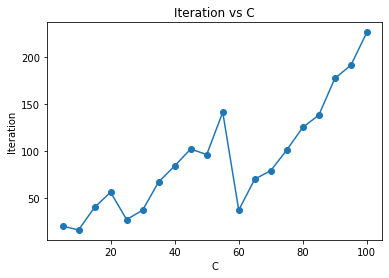

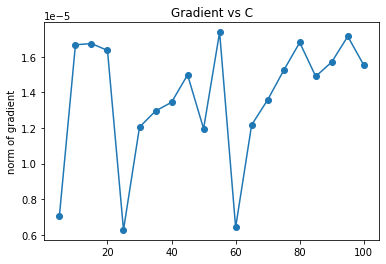

In [24]:
plt.plot(c,iteration,'-o')
plt.title('Iteration vs C')
plt.xlabel('C')
plt.ylabel('Iteration')
plt.show()

# the larger the norm of gradient, more far away from [0,0]
plt.plot(c,norm_gradient,'-o')
plt.title('Gradient vs C')
plt.ylabel('norm of gradient')
plt.show()